Classical package: H. Wickham’s ggplot2 Vignette

Referred from http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html

In [1]:
install.packages("ggplot2")
install.packages("ggrepel") 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library("ggplot2")
library("ggrepel")
library("scales")

Example Data: Housing prices

In [2]:
housing = read.csv("landdata-states.csv")
head(housing)

State region Date    Home.Value Structure.Cost Land.Value Land.Share..Pct.
1 AK    West   2010.25 224952     160599         64352      28.6            
2 AK    West   2010.50 225511     160252         65259      28.9            
3 AK    West   2009.75 225820     163791         62029      27.5            
4 AK    West   2010.00 224994     161787         63207      28.1            
5 AK    West   2008.00 234590     155400         79190      33.8            
6 AK    West   2008.25 233714     157458         76256      32.6            
  Home.Price.Index Land.Price.Index Year Qrtr
1 1.481            1.552            2010 1   
2 1.484            1.576            2010 2   
3 1.486            1.494            2009 3   
4 1.481            1.524            2009 4   
5 1.544            1.885            2007 4   
6 1.538            1.817            2008 1

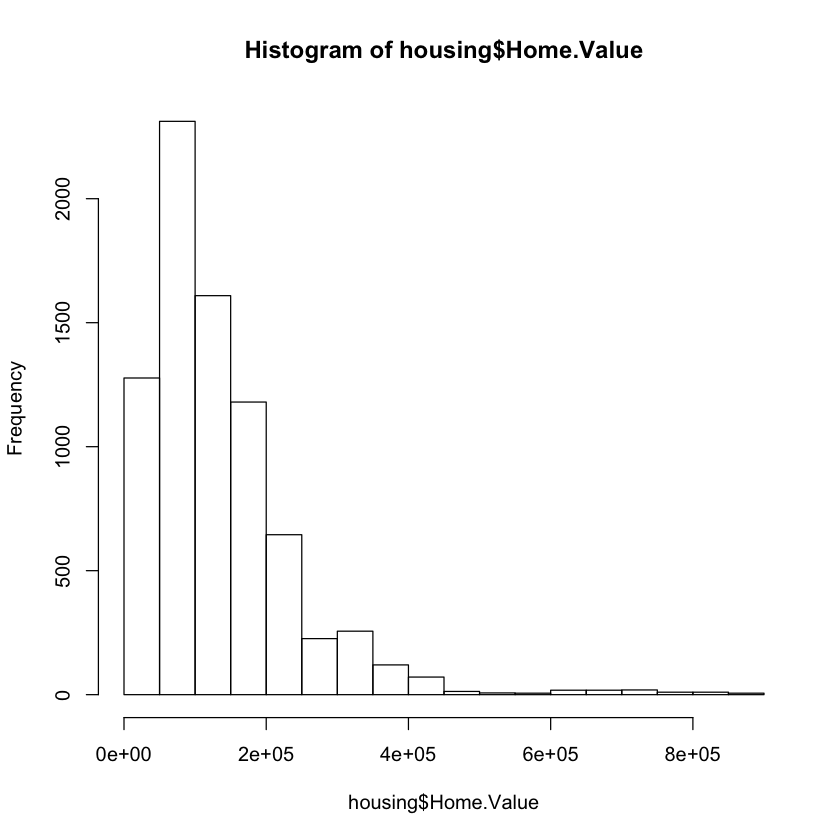

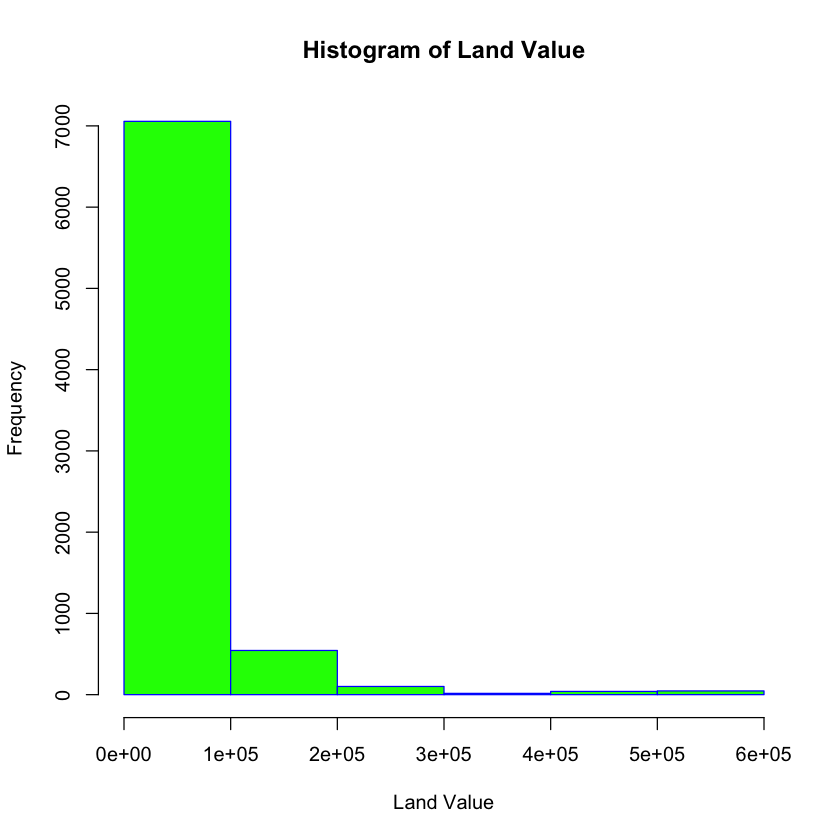

In [3]:
#Base graphics histogram example:

hist(housing$Home.Value)
hist(housing$Land.Value, main="Histogram of Land Value", xlab="Land Value", border="blue", col="green", breaks=5)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


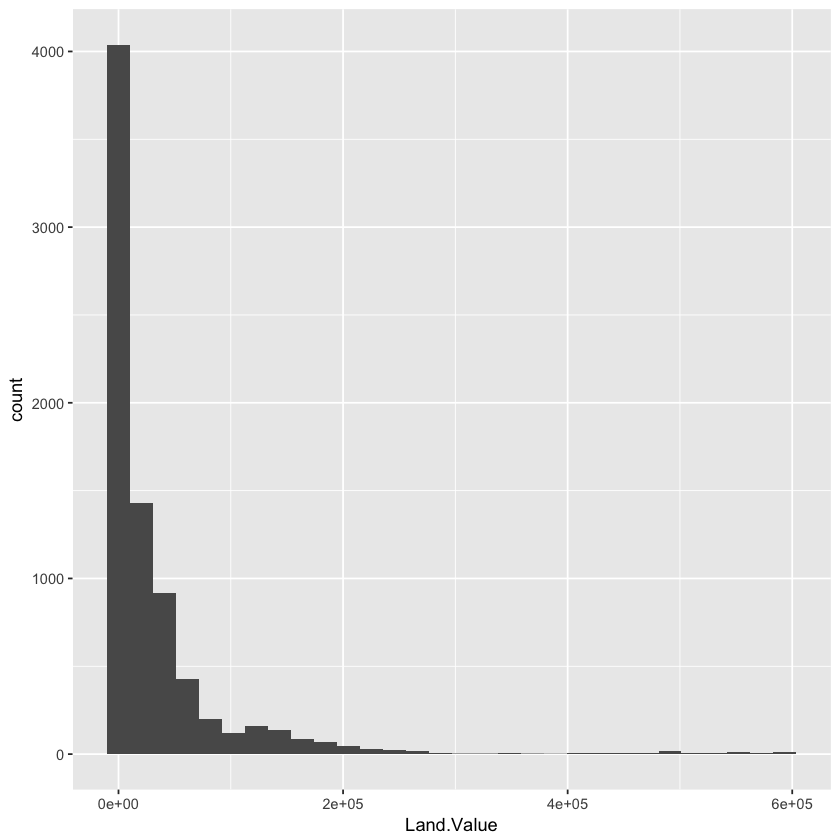

In [42]:
#ggplot2 histogram example:
ggplot(housing, aes(x = Land.Value)) + geom_histogram()

Complex Graphs:

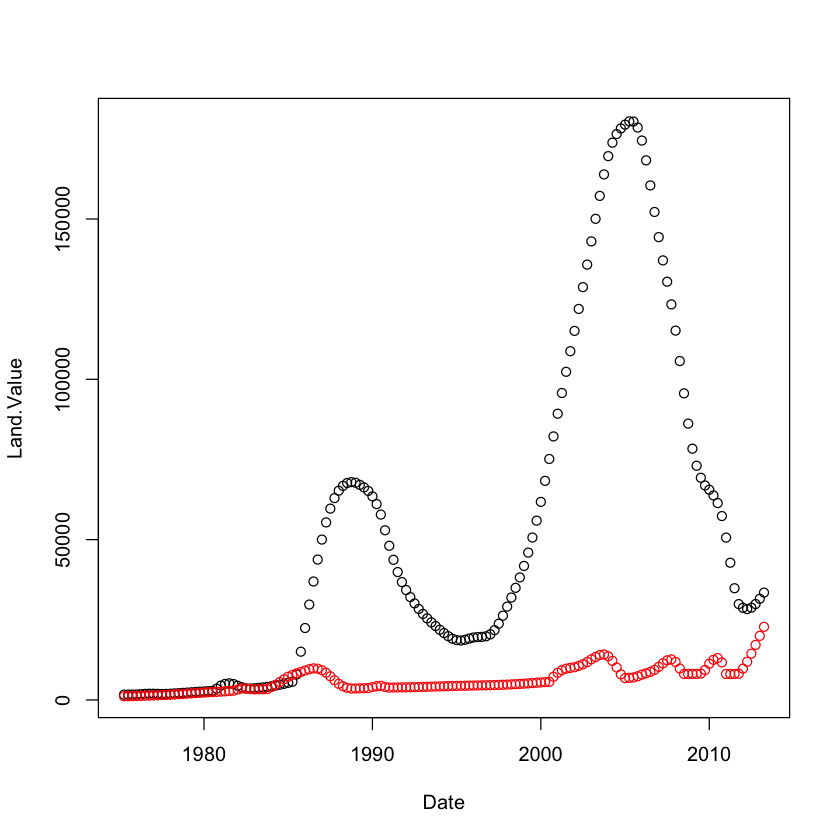

In [4]:
#Base colored scatter plot example
plot(Land.Value ~ Date,data=subset(housing, State == "MA"))
points(Land.Value ~ Date, col="red",data=subset(housing, State == "TX"))
legend(1975, 400000,c("MA", "TX"), title="State",col=c("black", "red"),pch=c(1, 1))

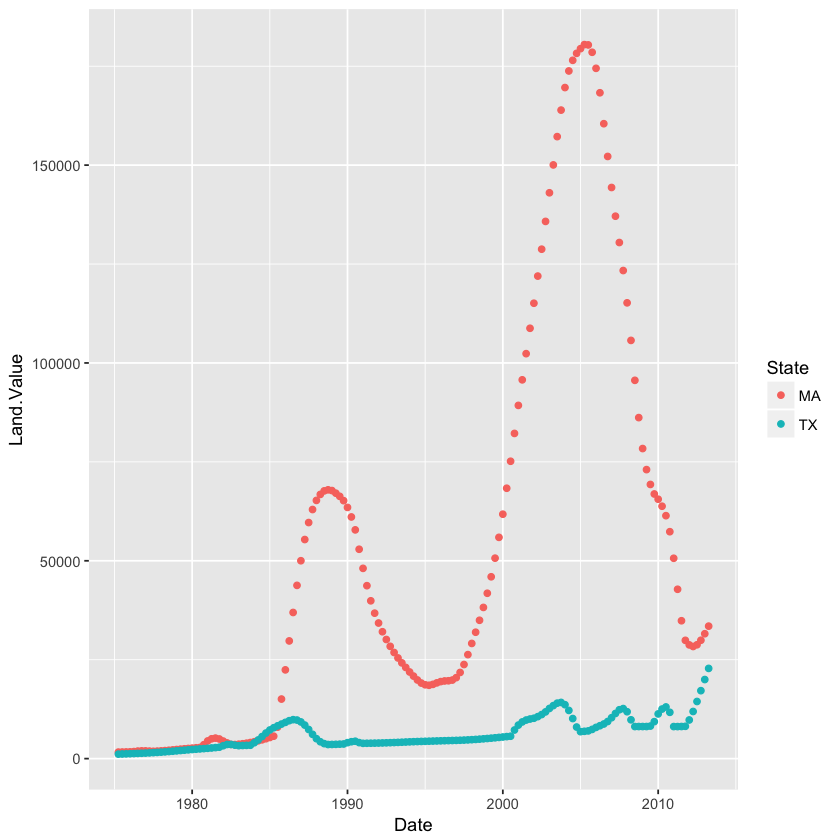

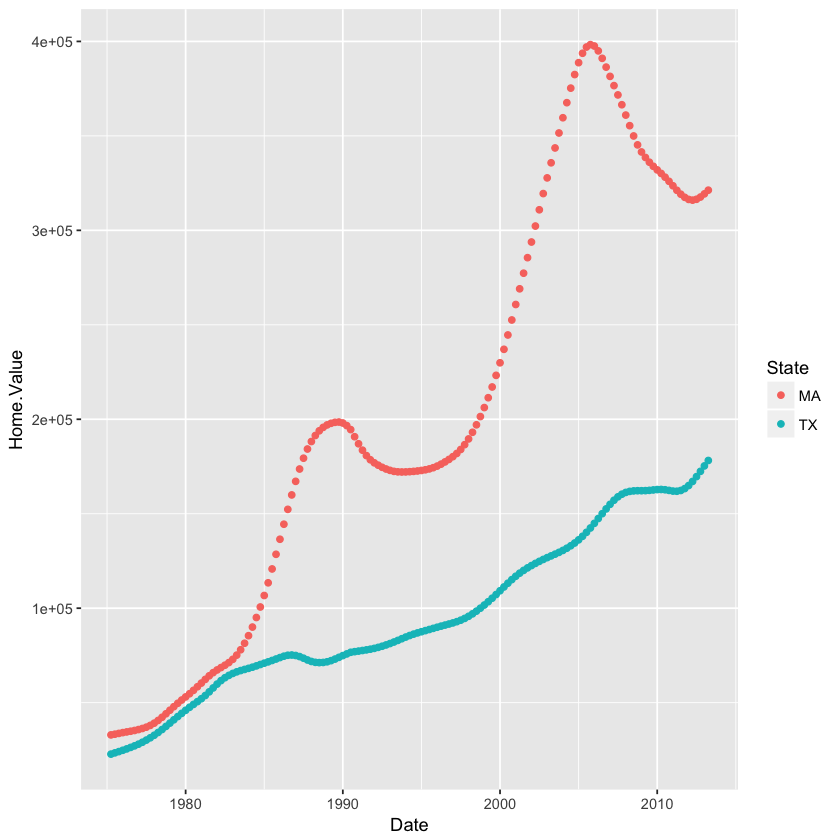

In [5]:
#ggplot2 colored scatter plot example:
ggplot(subset(housing, State %in% c("MA", "TX")),aes(x=Date,y=Land.Value,color=State)) + geom_point()
ggplot(subset(housing, State %in% c("MA", "TX")),aes(x=Date,y=Home.Value,color=State)) + geom_point()

In [6]:
#List of geometic objects
#help.search("geom_", package = "ggplot2")

Points: (Scatter Plot)

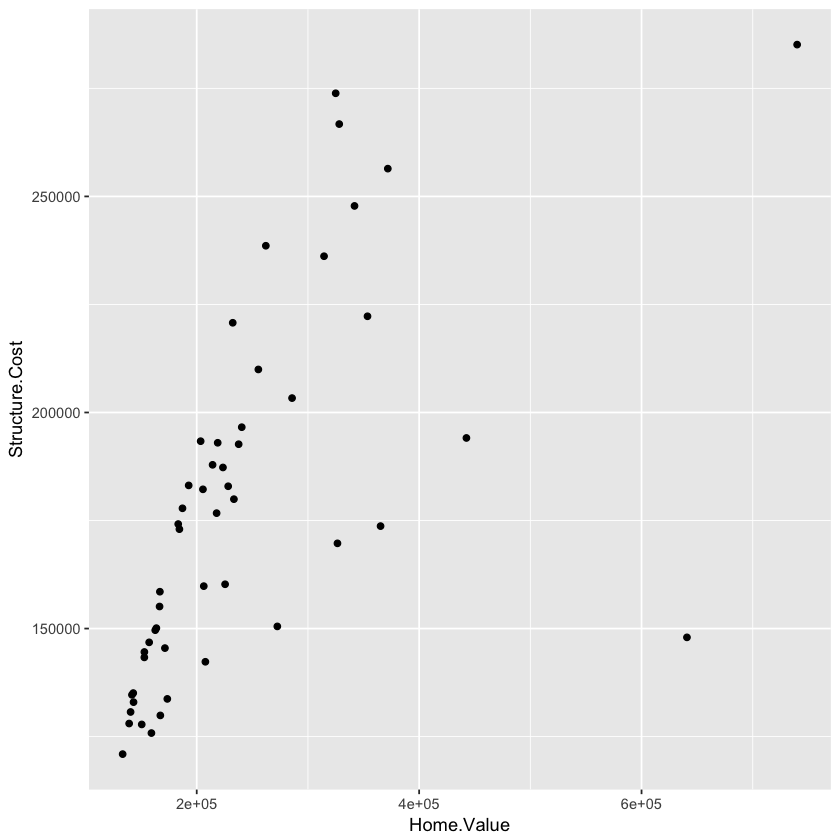

In [7]:
hp = subset(housing, Date == 2010.50) 
ggplot(hp,aes(y = Structure.Cost, x = Home.Value)) + geom_point()

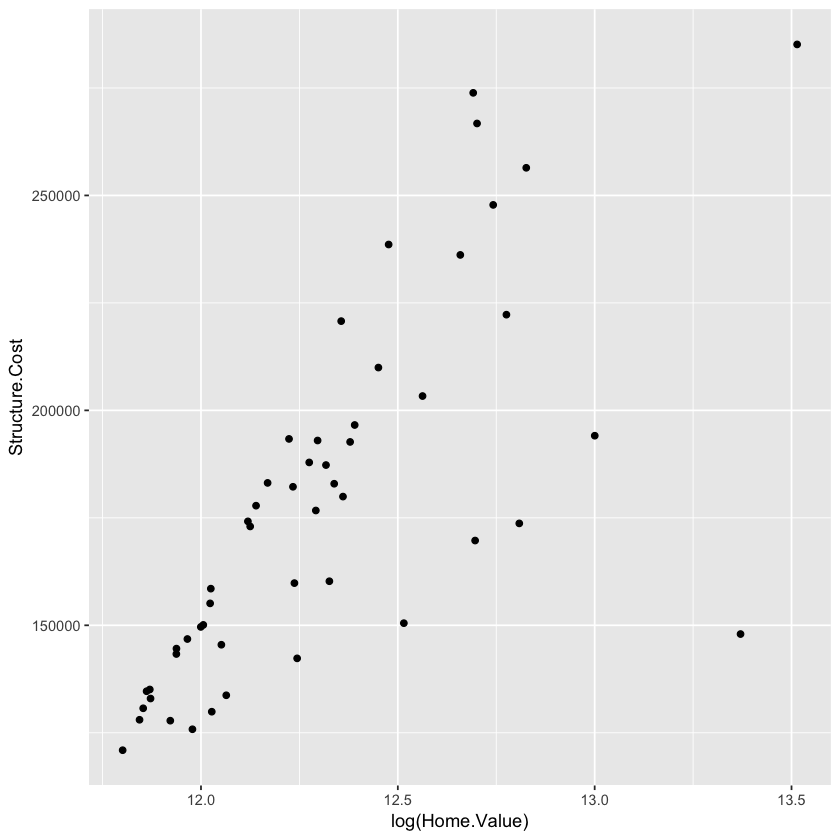

In [8]:
ggplot(hp,aes(y = Structure.Cost, x = log(Home.Value))) + geom_point()

Lines: (Prediction Line)

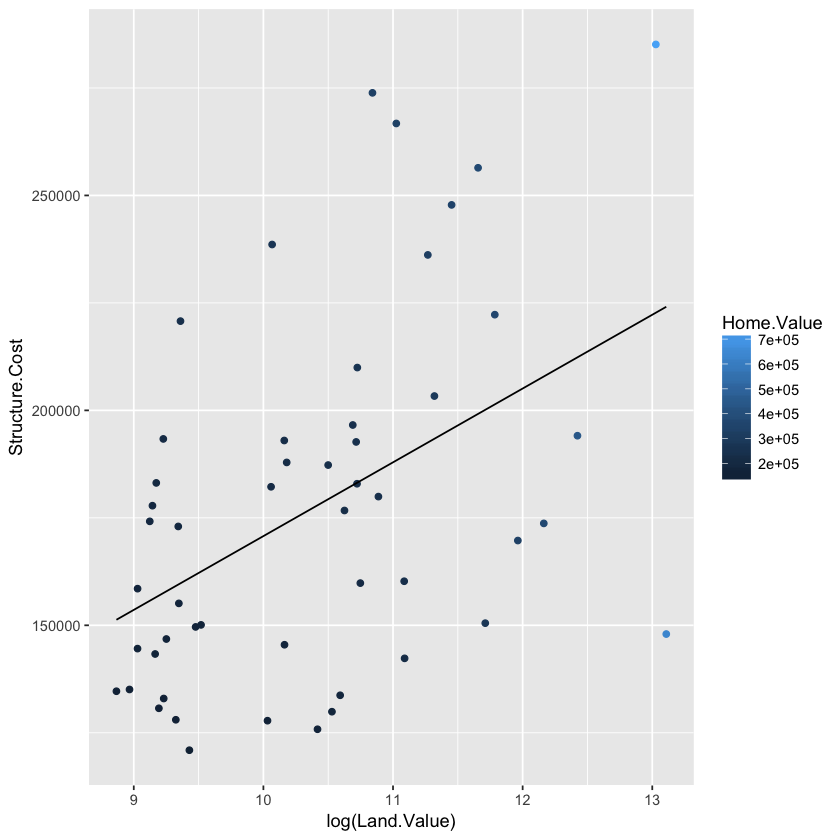

In [9]:
hp$pred.SC = predict(lm(Structure.Cost ~ log(Land.Value), data = hp))

p1 = ggplot(hp, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) + geom_line(aes(y = pred.SC))

`geom_smooth()` using method = 'loess'


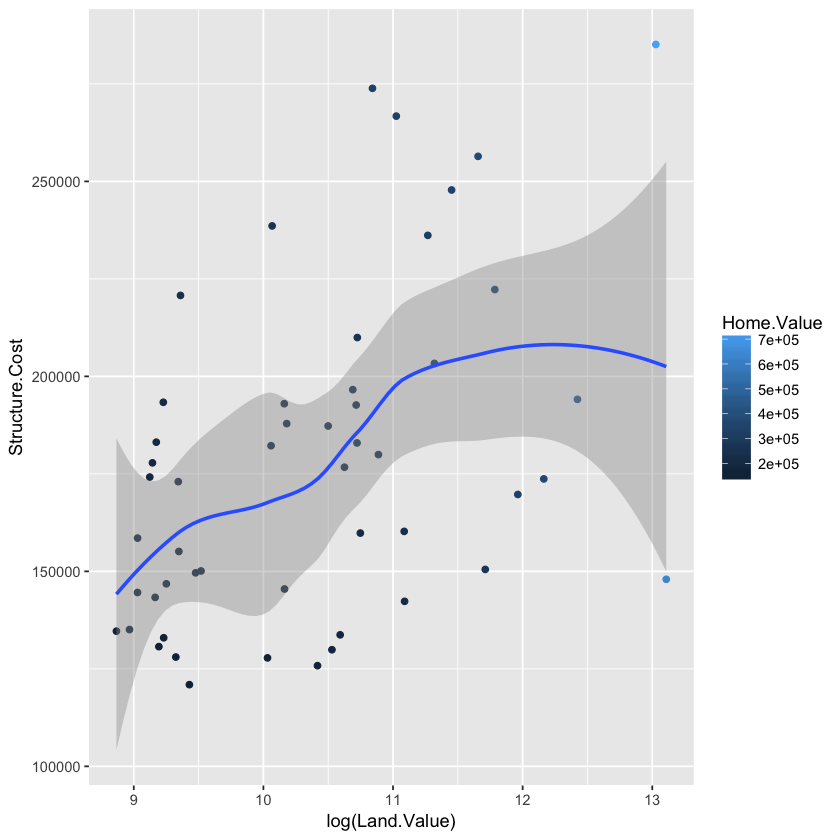

In [10]:
#Smoothers
p1 + geom_point(aes(color = Home.Value)) + geom_smooth()

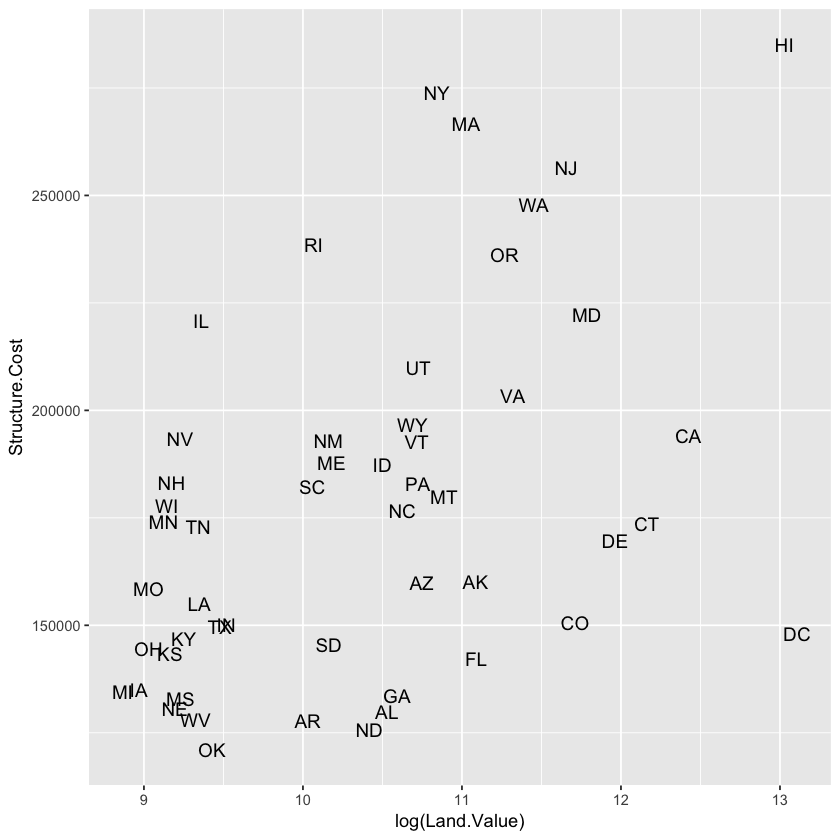

In [11]:
#Text: Label Points
p1 + geom_text(aes(label=State), size = 4)

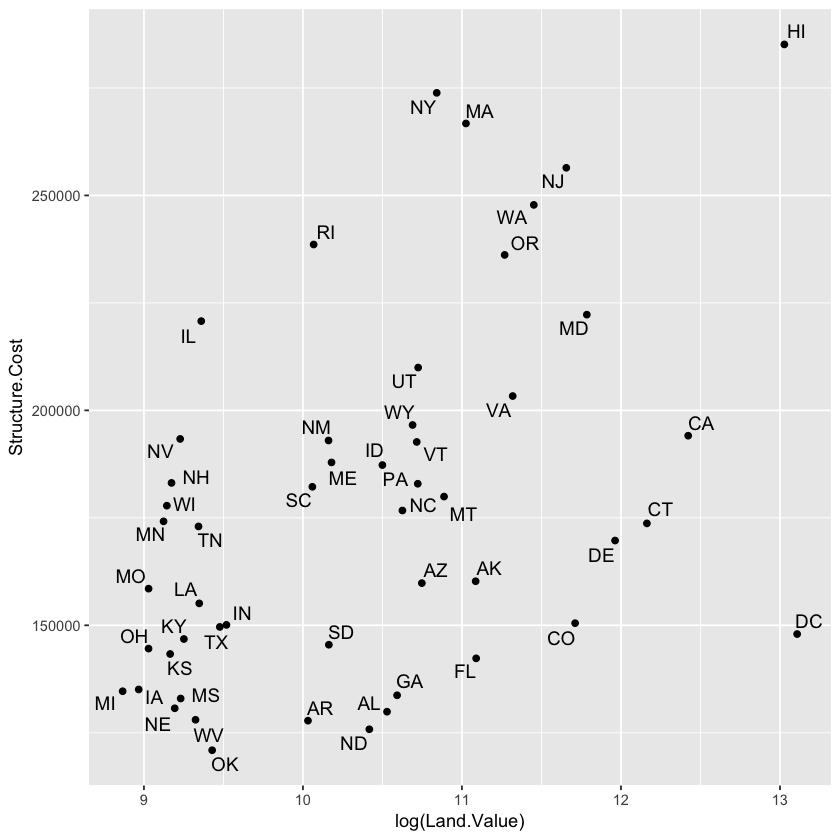

In [12]:
p1 + geom_point() + geom_text_repel(aes(label=State), size = 4)

Aesthetic Mapping

Warning message:
“Removed 1 rows containing missing values (geom_point).”

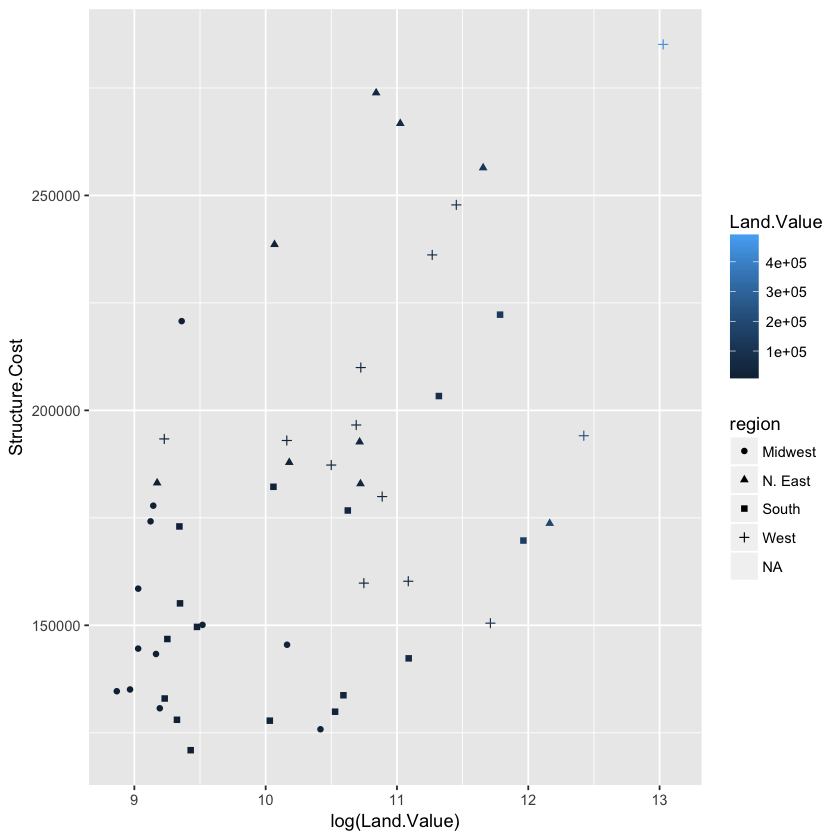

In [13]:
p1 + geom_point(aes(color=Land.Value, shape = region))

Exercise 1:

In [15]:
#Reading the data from EconomistData.csv
data <- read.csv("EconomistData.csv")
head(data)

X Country     HDI.Rank HDI   CPI Region           
1 1 Afghanistan 172      0.398 1.5 Asia Pacific     
2 2 Albania      70      0.739 3.1 East EU Cemt Asia
3 3 Algeria      96      0.698 2.9 MENA             
4 4 Angola      148      0.486 2.0 SSA              
5 5 Argentina    45      0.797 3.0 Americas         
6 6 Armenia      86      0.716 2.6 East EU Cemt Asia

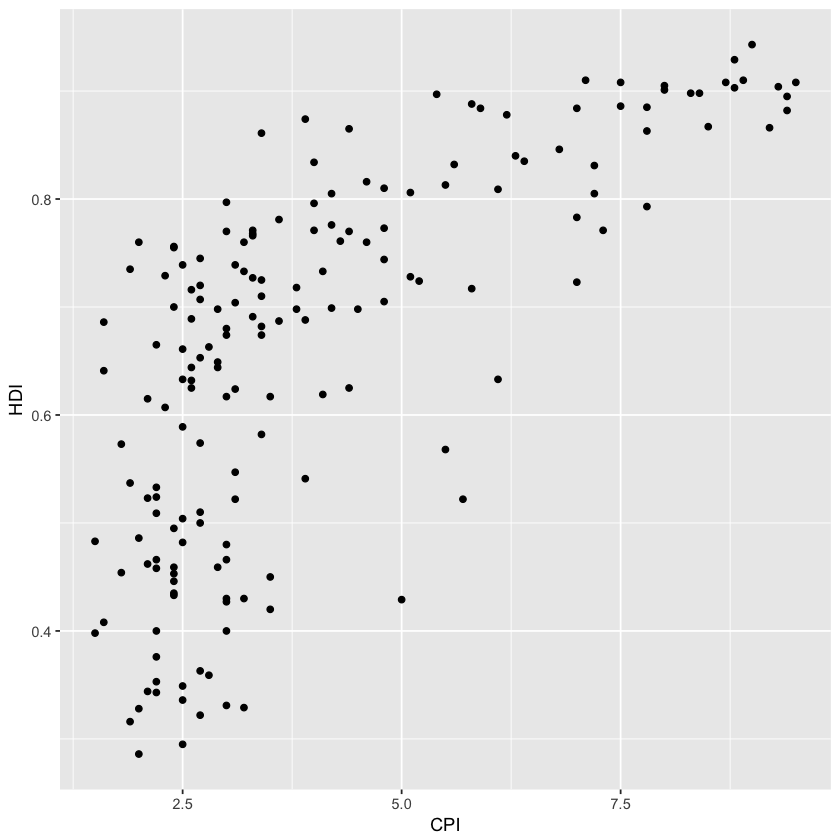

In [16]:
#1.Create a scatter plot with CPI on the x axis and HDI on the y axis.
ggplot(data, aes(x = CPI, y = HDI)) + geom_point()

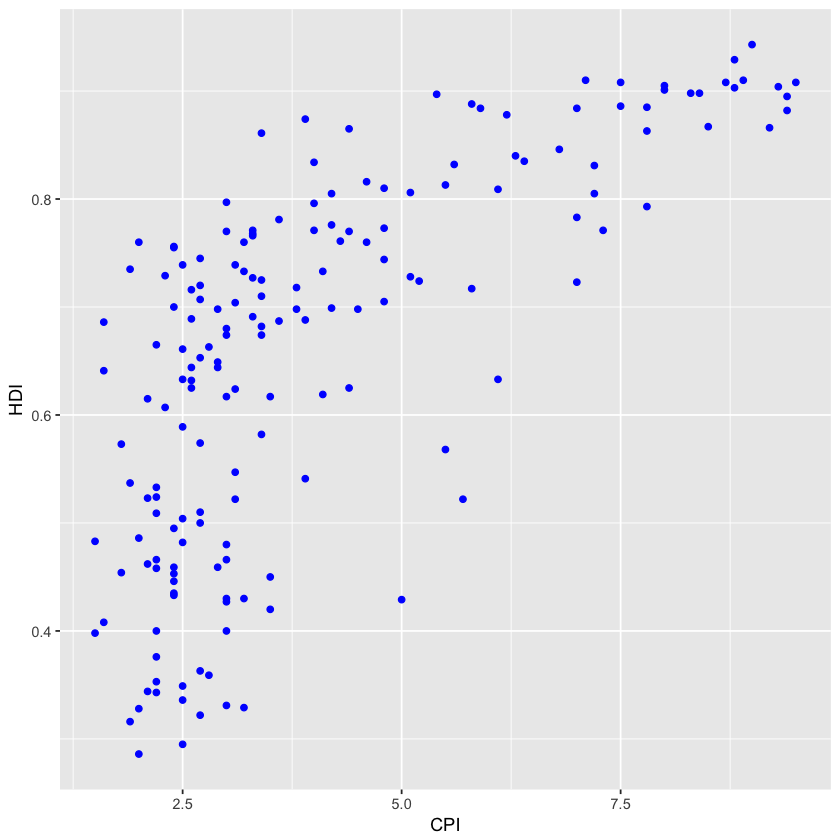

In [17]:
#2.Color the points blue.
ggplot(data, aes(x = CPI, y = HDI)) + geom_point(color="blue")

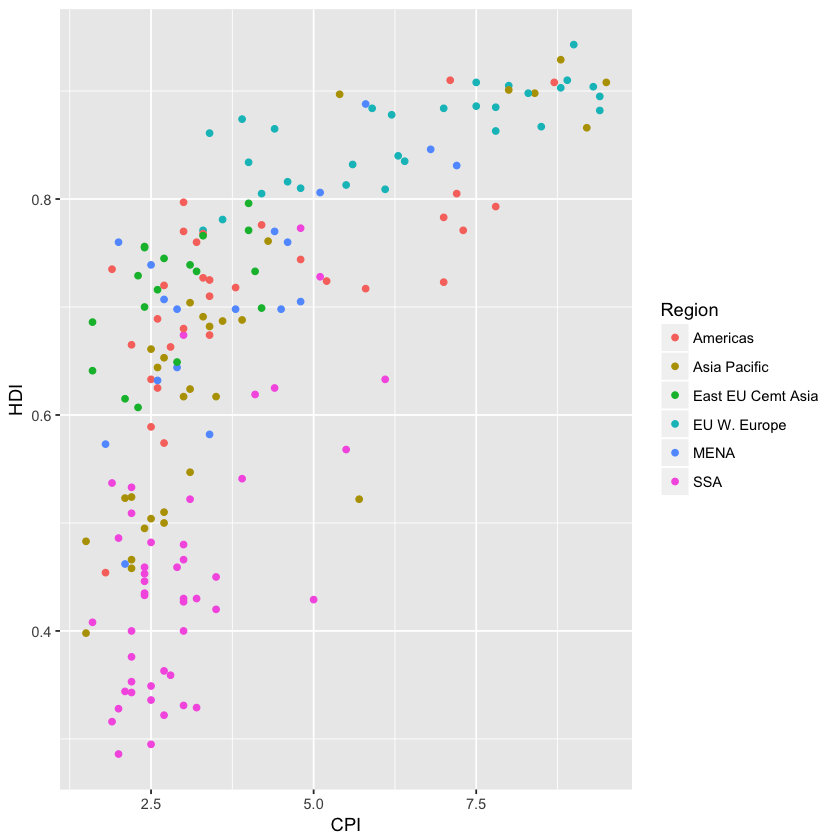

In [18]:
#3.Map the color of the the points to Region.
ggplot(data, aes(x = CPI, y = HDI)) + geom_point(aes(color=Region))

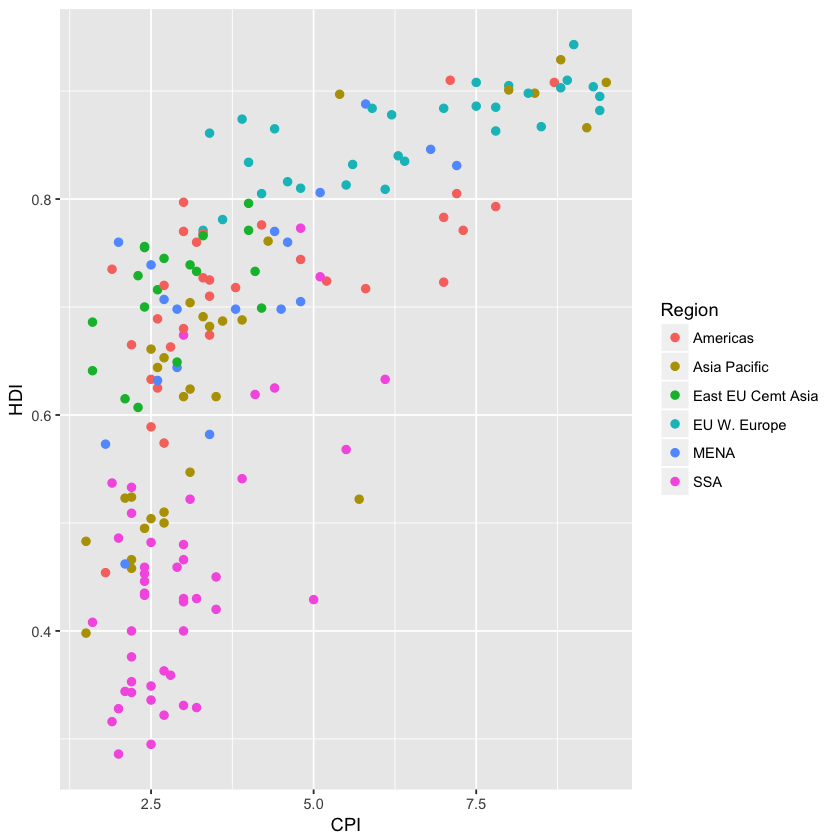

In [19]:
#4.Make the points bigger by setting size to 2
ggplot(data, aes(x = CPI, y = HDI)) + geom_point(aes(color=Region),size = 2)

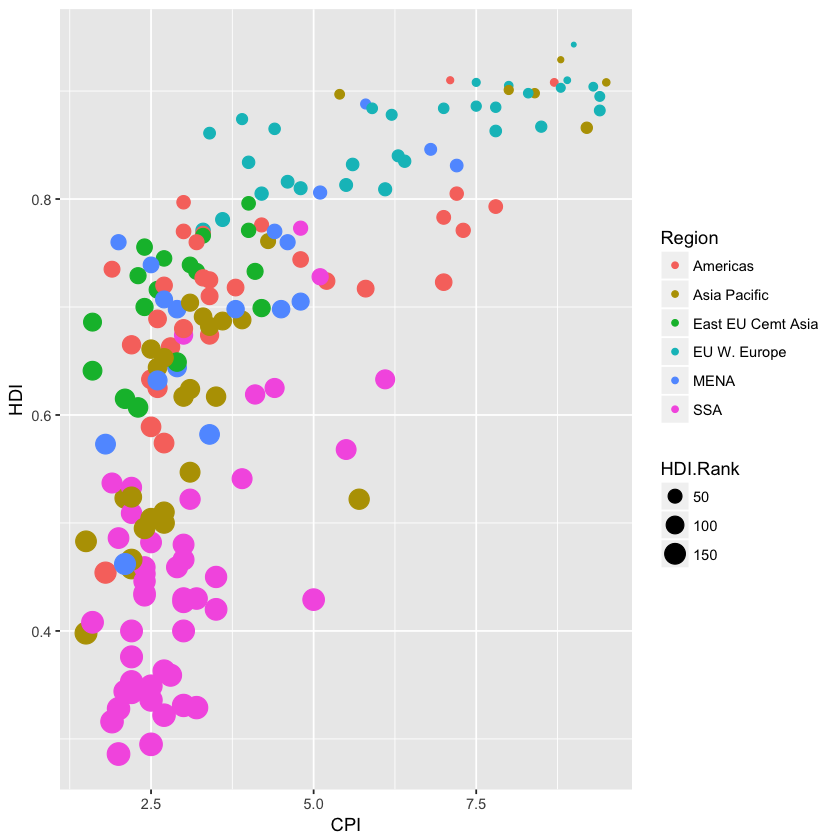

In [20]:
#5.Map the size of the points to HDI.Rank
ggplot(data, aes(x = CPI, y = HDI)) + geom_point(aes(color=Region,size = HDI.Rank))

Statistical Transformations

In [21]:
args(geom_histogram)
args(stat_bin)

function (mapping = NULL, data = NULL, stat = "bin", position = "stack", 
    ..., binwidth = NULL, bins = NULL, na.rm = FALSE, show.legend = NA, 
    inherit.aes = TRUE) 
NULL

function (mapping = NULL, data = NULL, geom = "bar", position = "stack", 
    ..., binwidth = NULL, bins = NULL, center = NULL, boundary = NULL, 
    breaks = NULL, closed = c("right", "left"), pad = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


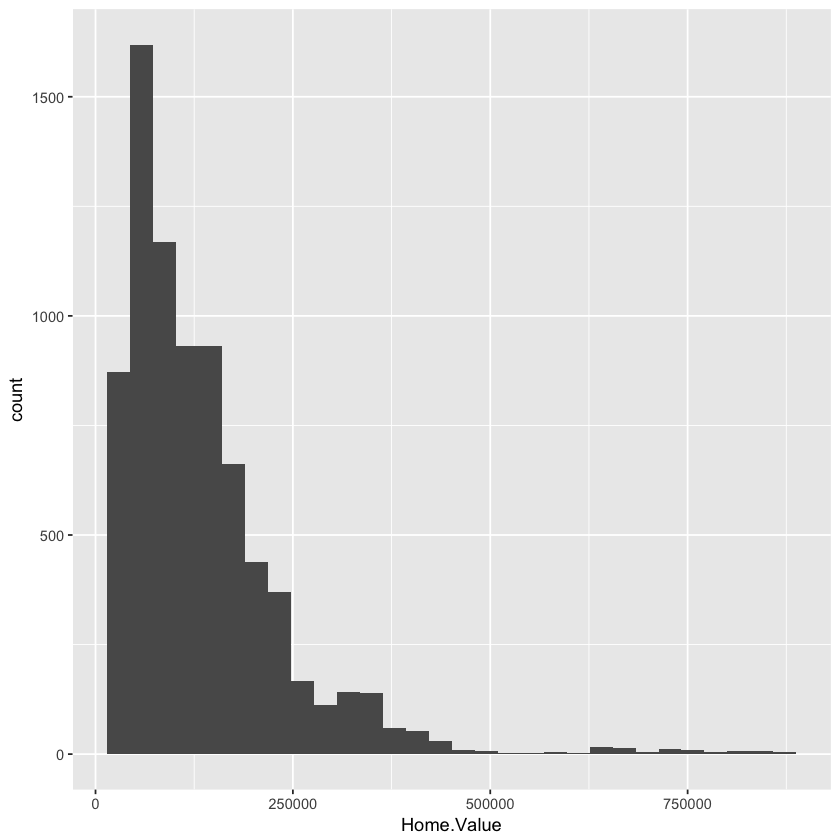

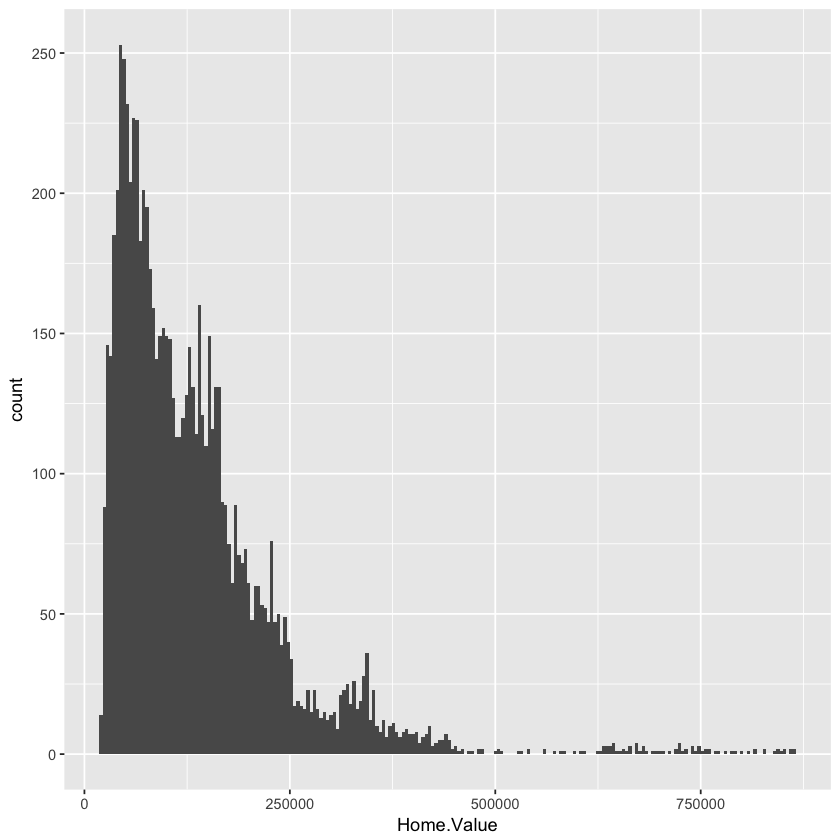

In [22]:
p2 = ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()
p2 + geom_histogram(stat = "bin", binwidth=4000)

In [23]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

State Home.Value
1  AK    147385.14 
2  AL     92545.22 
3  AR     82076.84 
4  AZ    140755.59 
5  CA    282808.08 
6  CO    158175.99 
46 VA    155391.44 
47 VT    132394.60 
48 WA    178522.58 
49 WI    108359.45 
50 WV     77161.71 
51 WY    122897.25

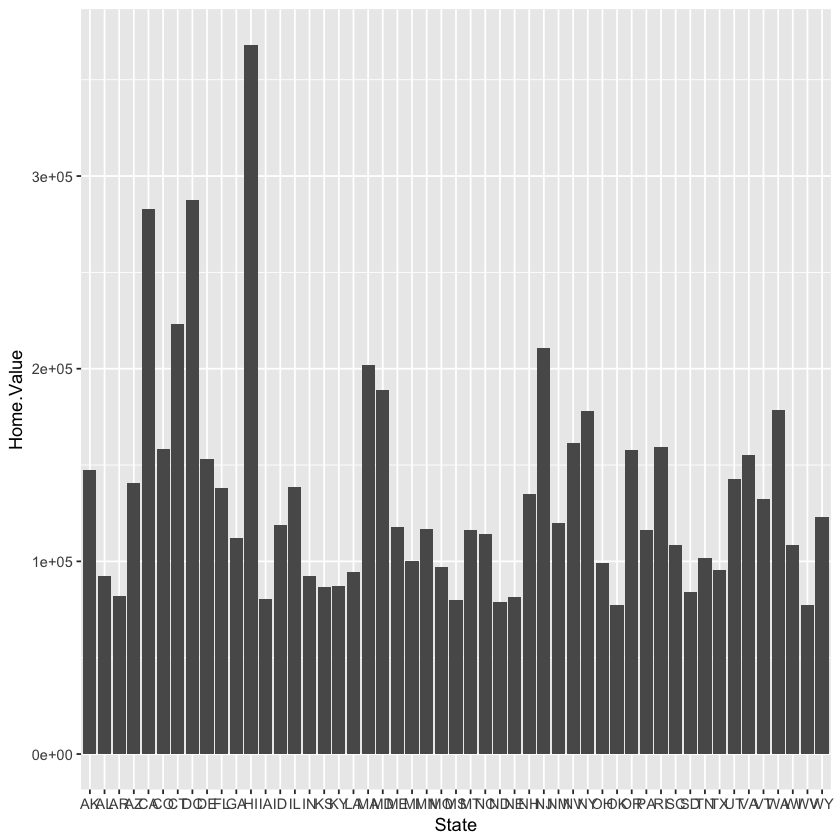

In [24]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + geom_bar(stat="identity")

Exercise 2

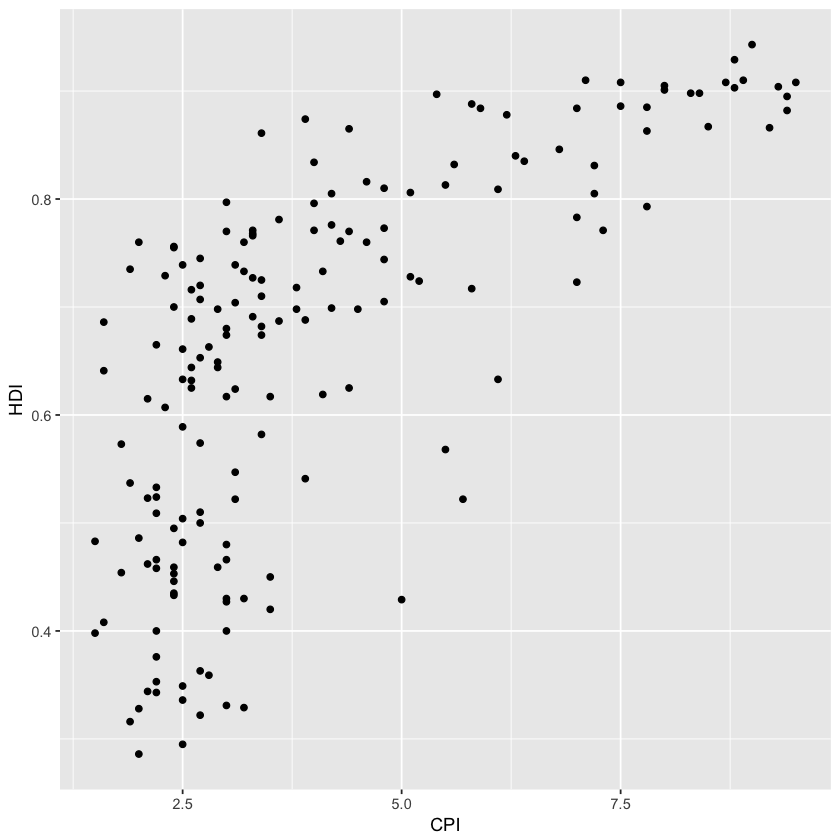

In [25]:
#1.Re-create a scatter plot with CPI on the x axis and HDI on the y axis (as you did in the previous exercise).
p2 = ggplot(data, aes(x = CPI, y = HDI)) + geom_point()
p2

`geom_smooth()` using method = 'loess'


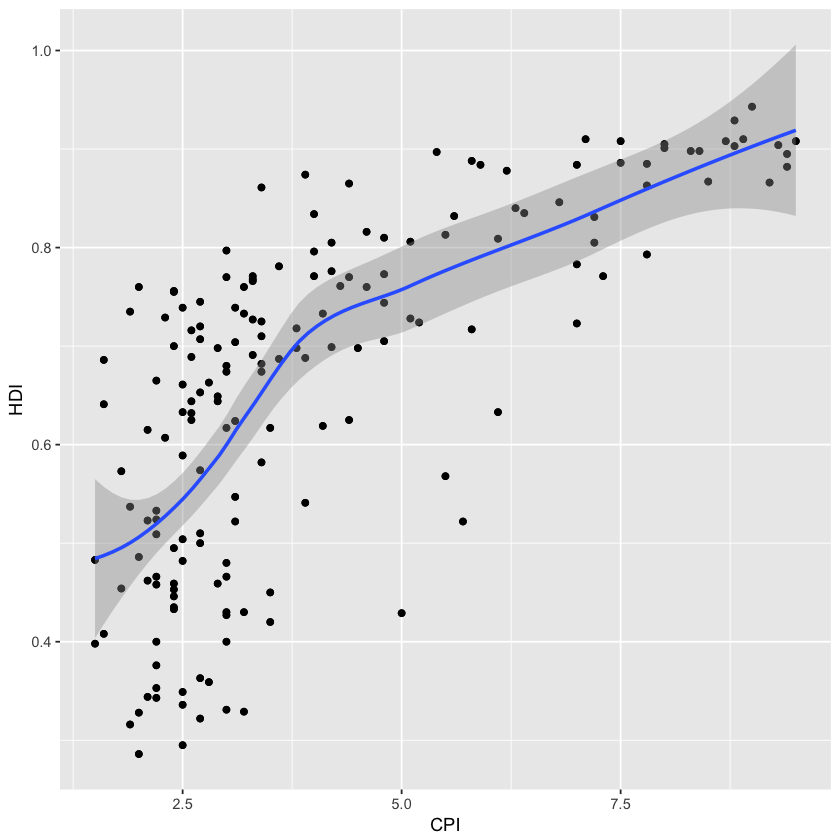

In [26]:
#2.Overlay a smoothing line on top of the scatter plot using geom_smooth.
p2 + geom_point() + geom_smooth()

function (mapping = NULL, data = NULL, geom = "smooth", position = "identity", 
    ..., method = "auto", formula = y ~ x, se = TRUE, n = 80, 
    span = 0.75, fullrange = FALSE, level = 0.95, method.args = list(), 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

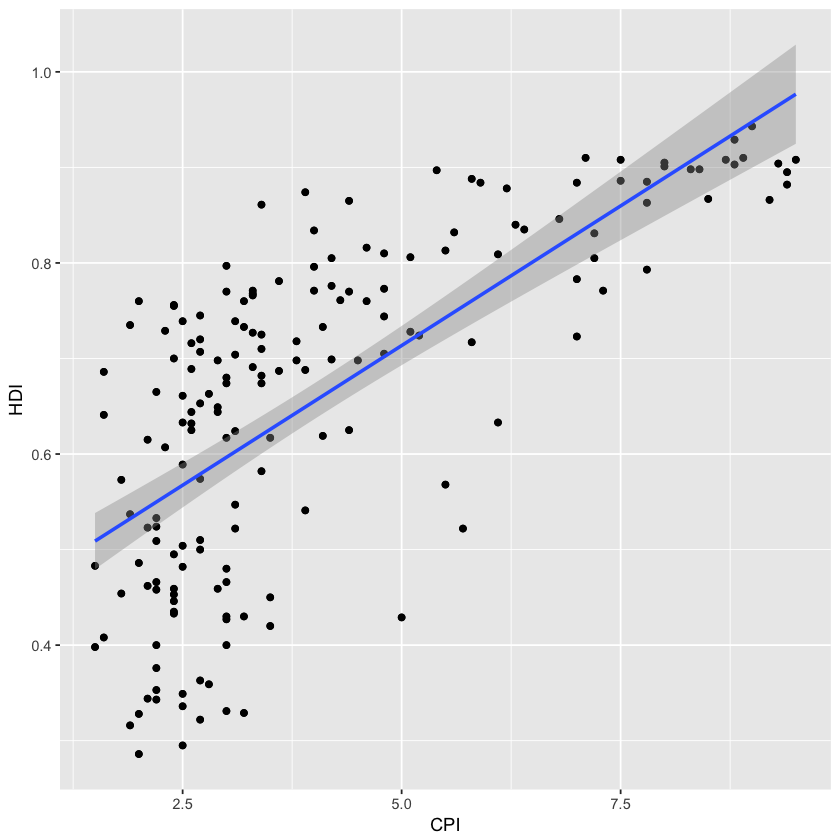

In [27]:
#4.Overlay a smoothing line on top of the scatter plot using geom_smooth, but use a linear model for the predictions.
args(stat_smooth)
p2 + geom_point() + geom_smooth(stat="smooth",method="lm")

function (mapping = NULL, data = NULL, stat = "identity", position = "identity", 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE, ...) 
NULL

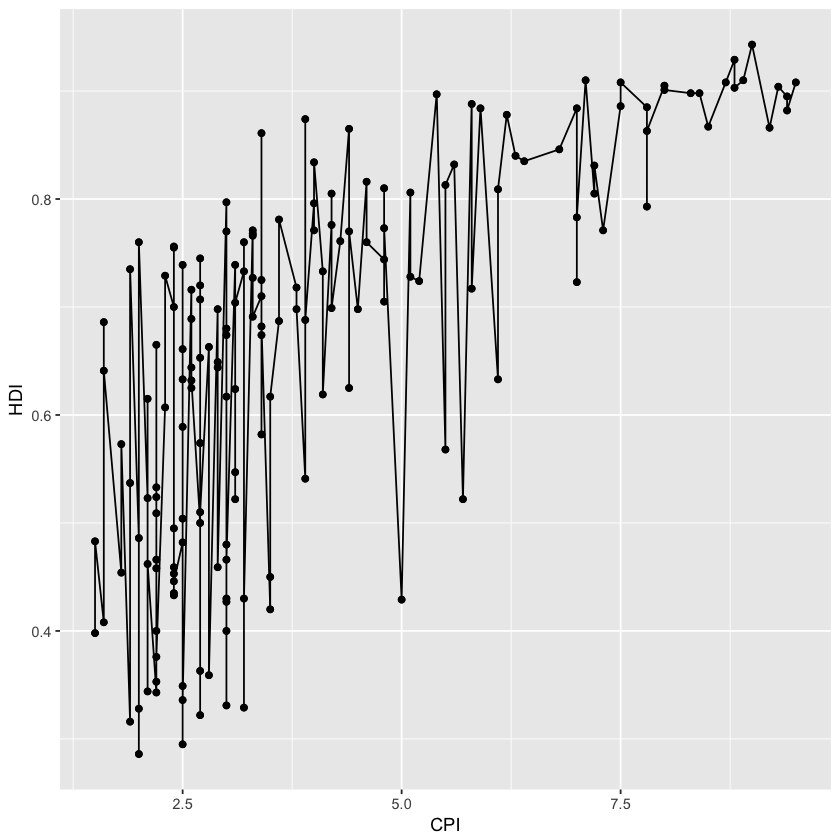

In [28]:
#4.Overlay a smoothing line on top of the scatter plot using geom_line.
args(geom_line)
p2 + geom_point() + geom_line(stat="identity")

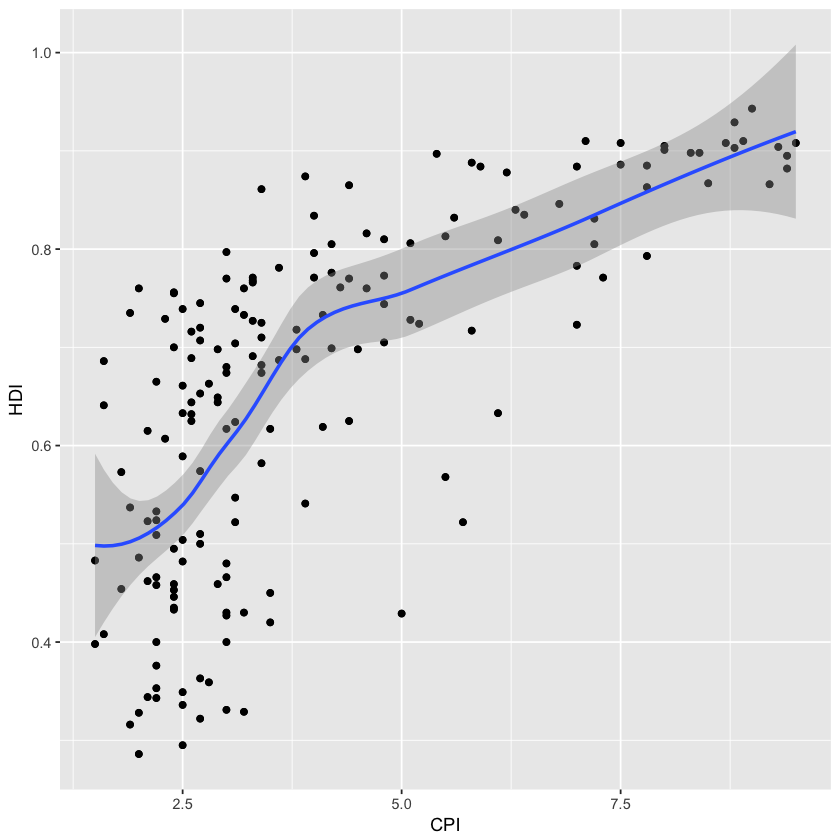

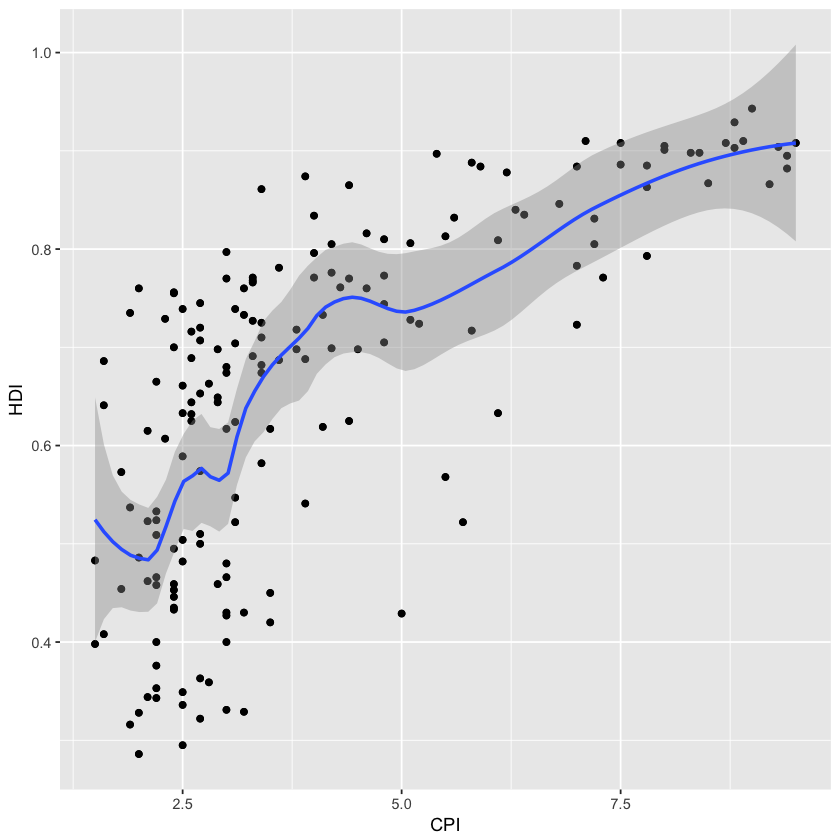

In [29]:
#5.BONUS: Overlay a smoothing line on top of the scatter plot using the default loess method, but make it less smooth
#span:smoothness parameter for loess.
p2 + geom_point() + geom_smooth(method="loess",span = 2/3)
p2 + geom_point() + geom_smooth(method="loess",span = 1/3)

Scales

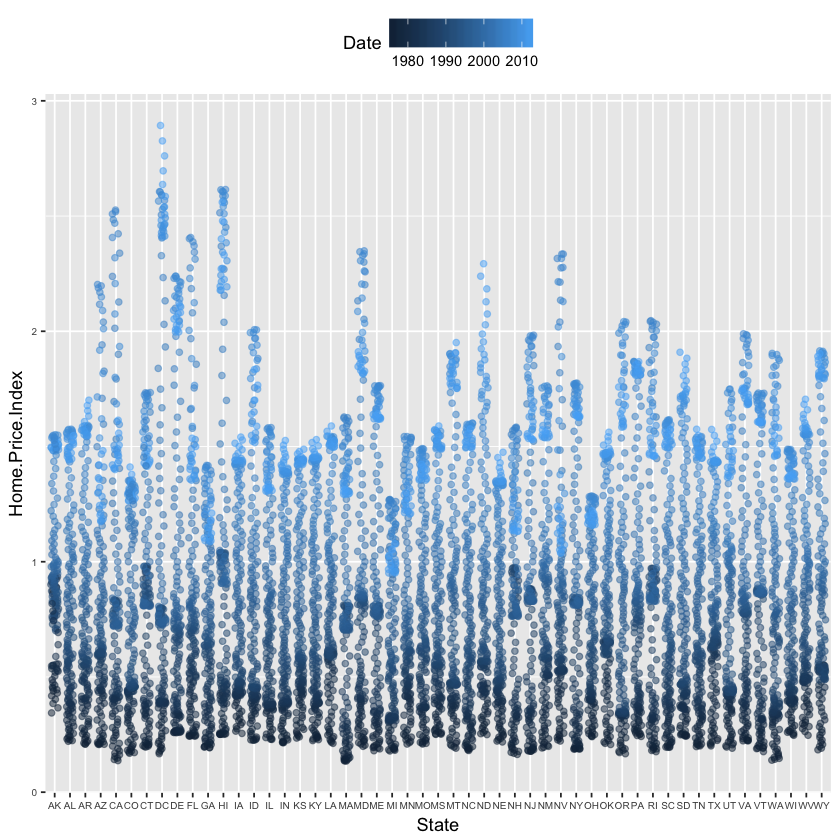

In [30]:
#Dotplot showing the distribution of home values by Date and State.
p3 = ggplot(housing,aes(x = State, y = Home.Price.Index)) + theme(legend.position="top",
              axis.text=element_text(size = 6))
p4 = p3 + geom_point(aes(color = Date), alpha = 0.5, size = 1.5, position = position_jitter(width = 0.25, height = 0))
p4

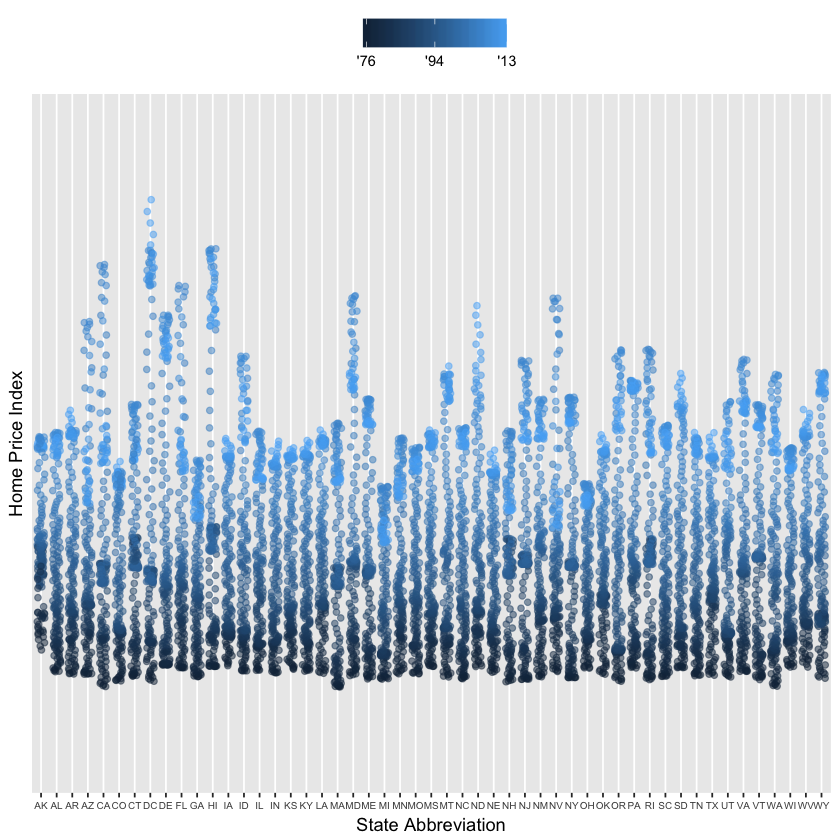

In [31]:
#Modifying breaks for x axis and color scales
p4 + scale_x_discrete(name="State Abbreviation") + scale_y_discrete(name="Home Price Index") + scale_color_continuous(name="", breaks = c(1976, 1994, 2013), labels = c("'76", "'94", "'13"))

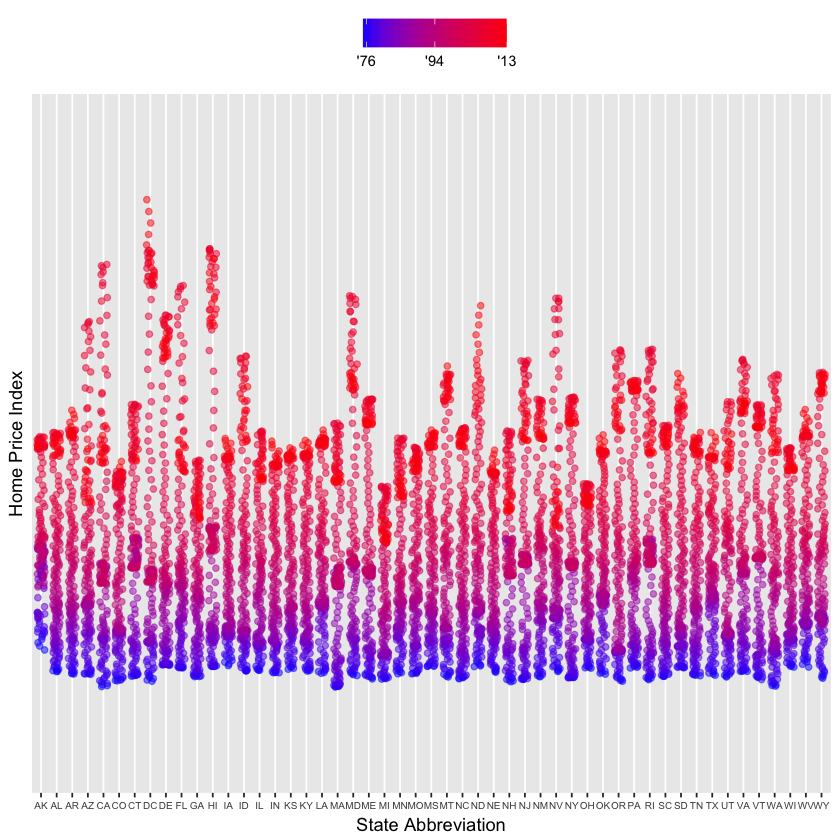

In [32]:
p4 + scale_x_discrete(name="State Abbreviation") + scale_y_discrete(name="Home Price Index") + scale_color_continuous(name="", breaks = c(1976, 1994, 2013), labels = c("'76", "'94", "'13"),low="blue",high="red")

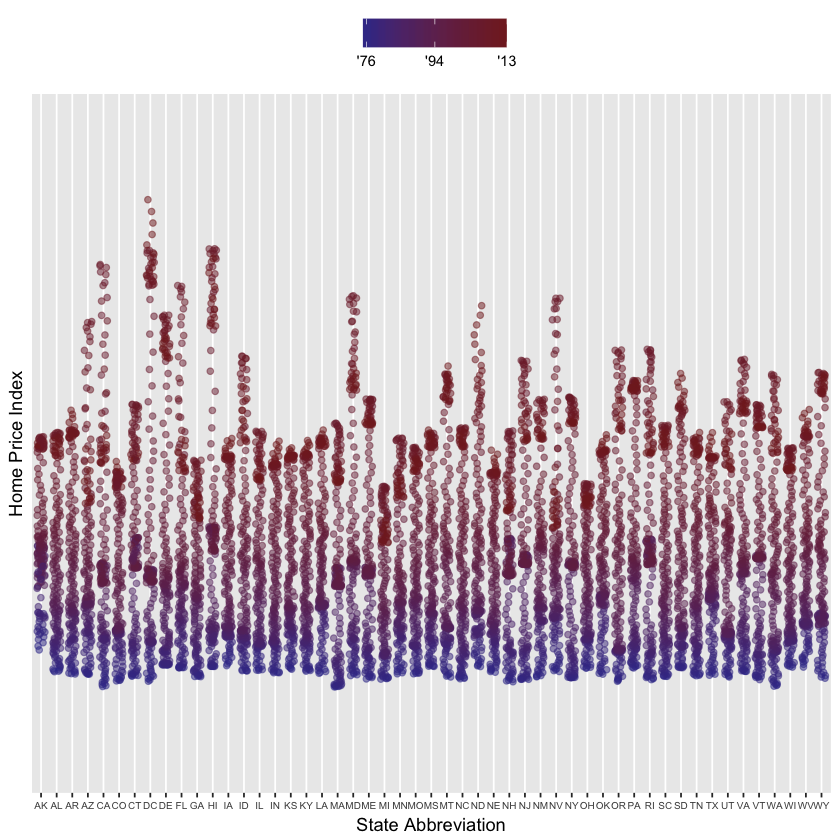

In [33]:
p4 + scale_x_discrete(name="State Abbreviation") + scale_y_discrete(name="Home Price Index") + scale_color_continuous(name="", breaks = c(1976, 1994, 2013), labels = c("'76", "'94", "'13"),low=muted("blue"),high=muted("red"))

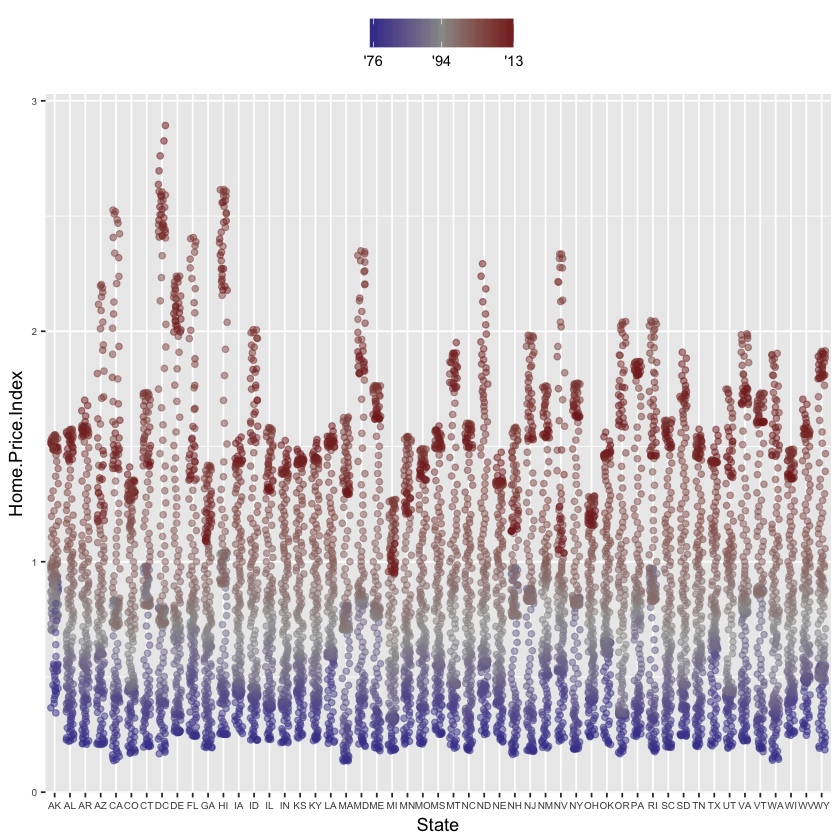

In [34]:
#Using different colour scales
p4 + scale_color_gradient2(name="", breaks = c(1976, 1994, 2013), labels = c("'76", "'94", "'13"), low = muted("blue"), high = muted("red"), mid = "gray60", midpoint = 1994)

Exercise 3

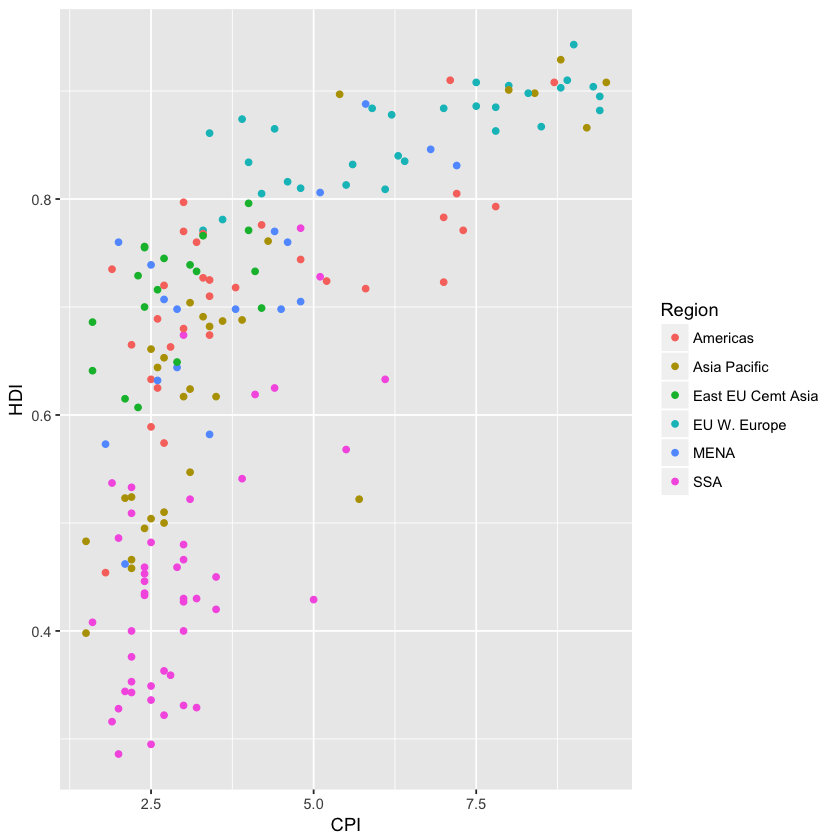

In [35]:
#1.Create a scatter plot with CPI on the x axis and HDI on the y axis. Color the points to indicate region.
p5 = ggplot(data, aes(x = CPI, y = HDI)) + geom_point(aes(color=Region))
p5

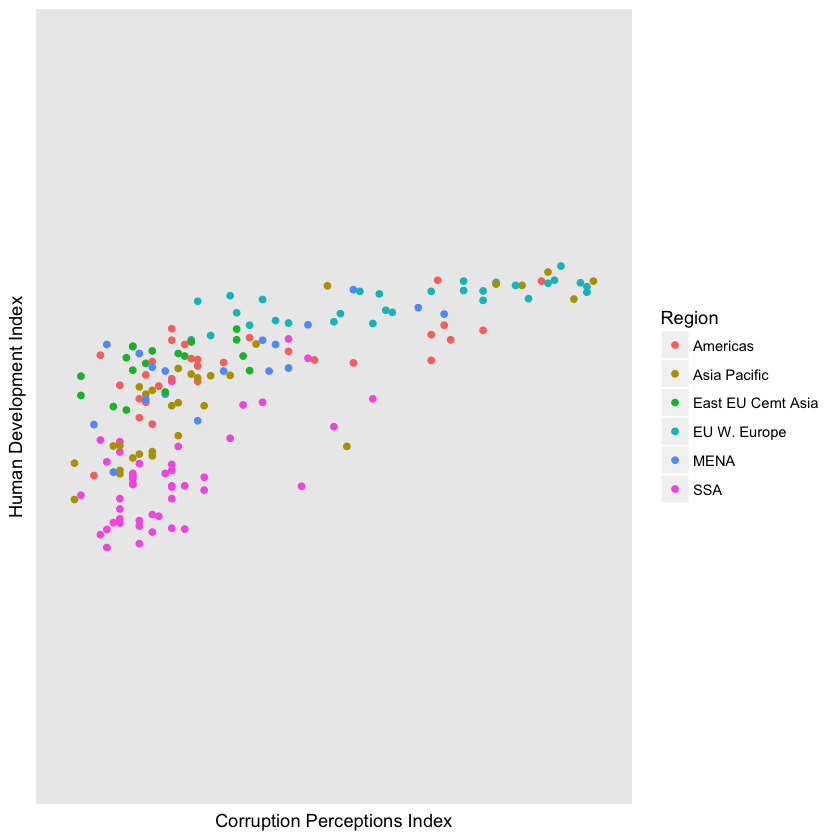

In [36]:
#2.Modify the x, y, and color scales so that they have more easily-understood names.
ggplot(data, aes(x = CPI, y = HDI)) + geom_point(aes(color=Region)) + scale_x_discrete(name="Corruption Perceptions Index") + scale_y_discrete(name="Human Development Index")

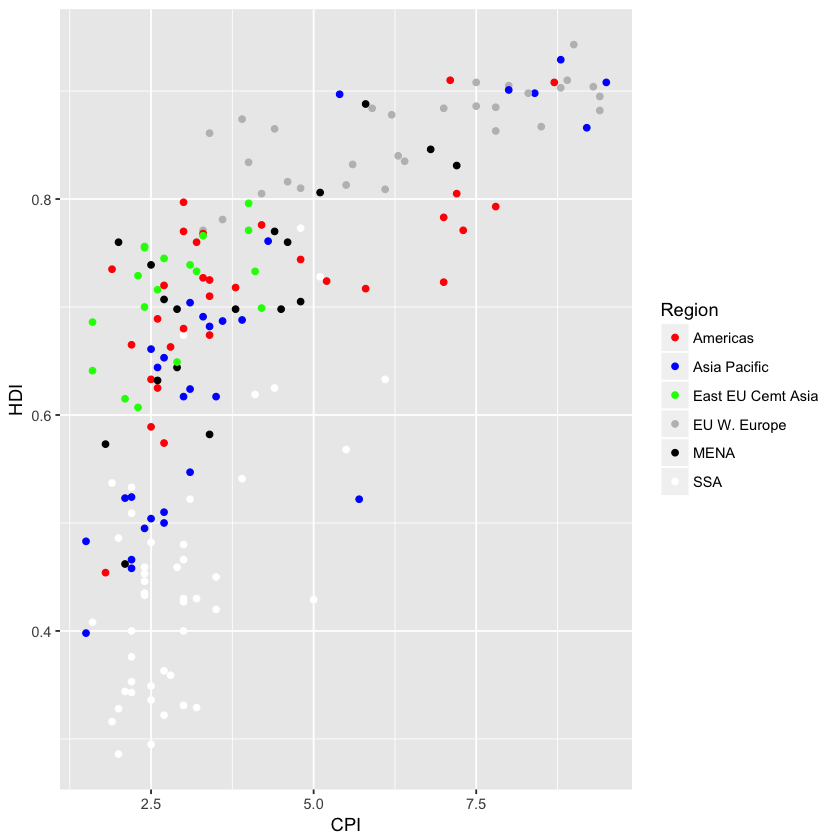

In [37]:
#3.Modify the color scale to use specific values of your choosing.
ggplot(data, aes(x = CPI, y = HDI)) + geom_point(aes(color=Region)) + scale_colour_manual(values = c("red","blue", "green","grey","black","white"))

Faceting

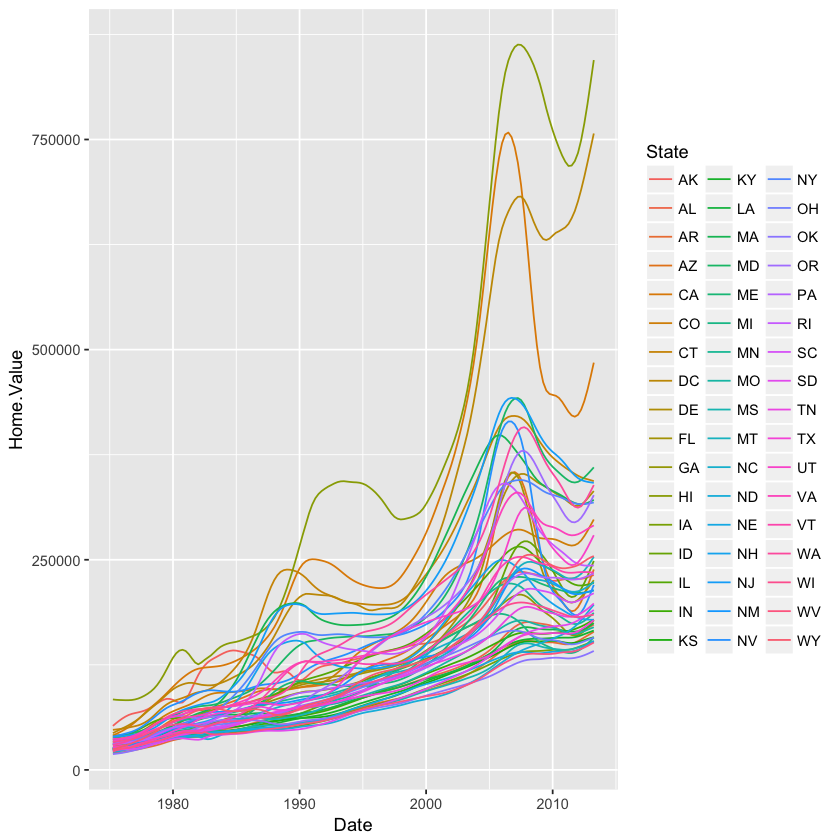

In [38]:
#Mapping state to color
ggplot(housing, aes(x = Date, y = Home.Value)) + geom_line(aes(color = State))

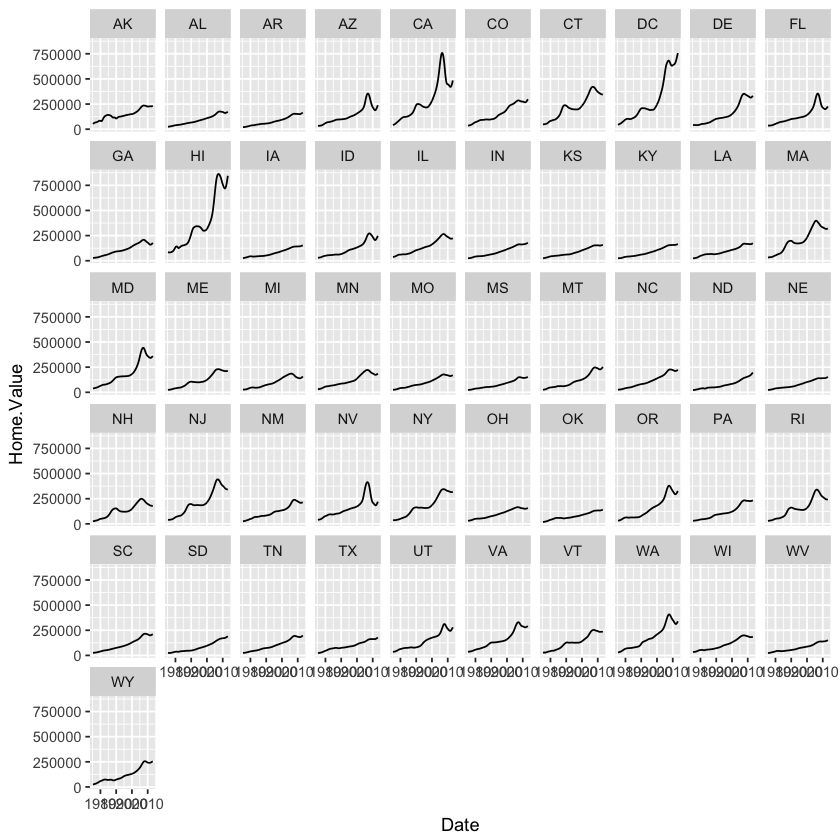

In [39]:
ggplot(housing, aes(x = Date, y = Home.Value))+ geom_line() + facet_wrap(~State, ncol = 10)

Themes

In [40]:
p6 = ggplot(housing, aes(x = Date, y = Home.Value)) +geom_line() + facet_wrap(~State, ncol = 10)

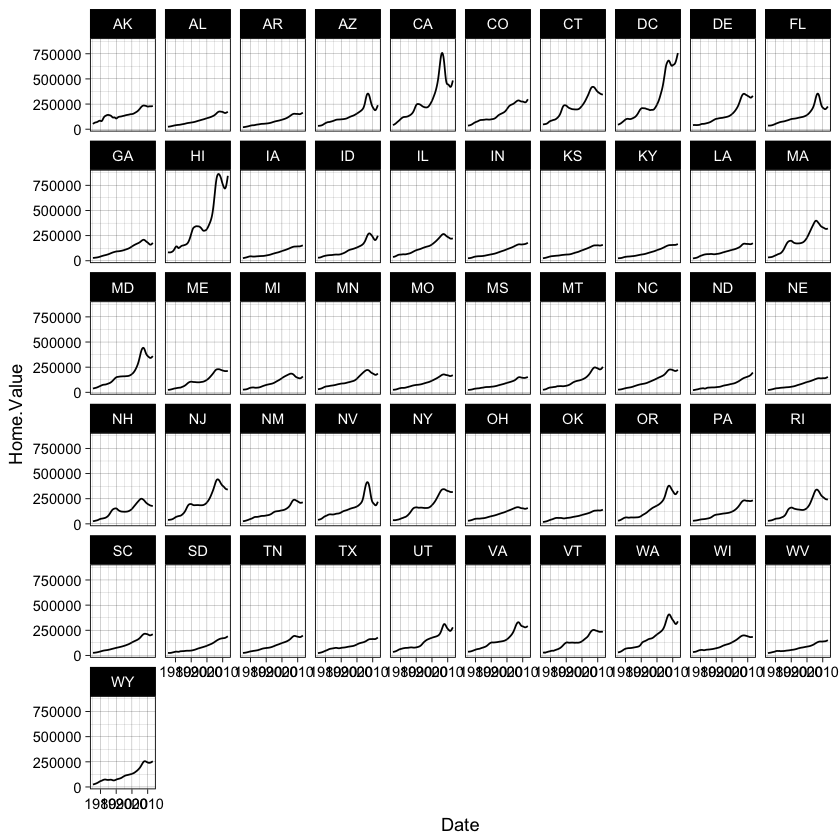

In [41]:
p6 + theme_linedraw()

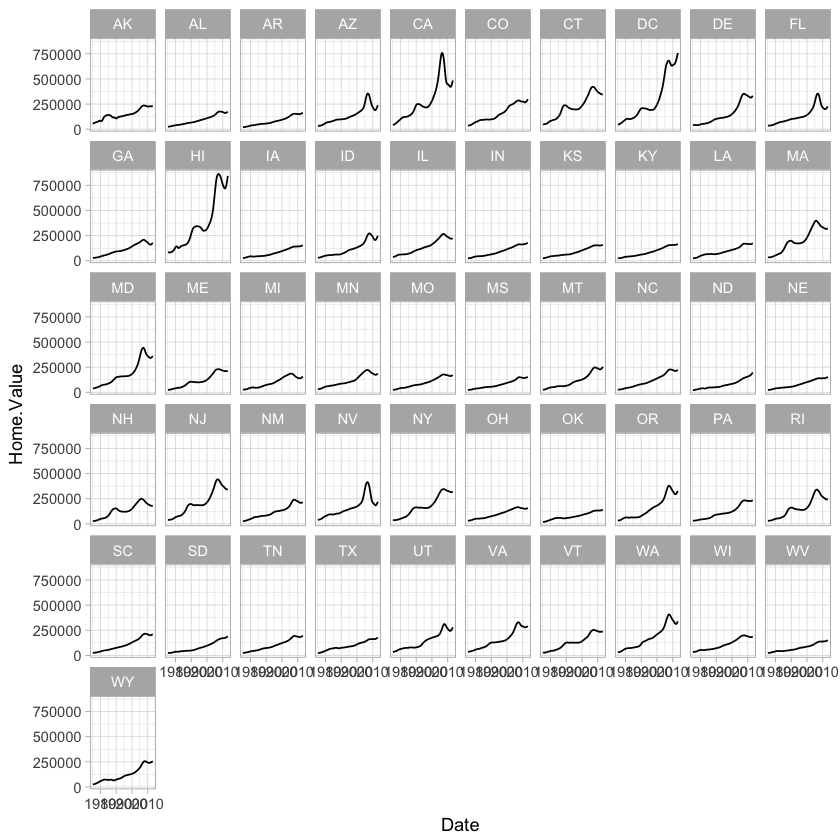

In [42]:
p6 + theme_light()

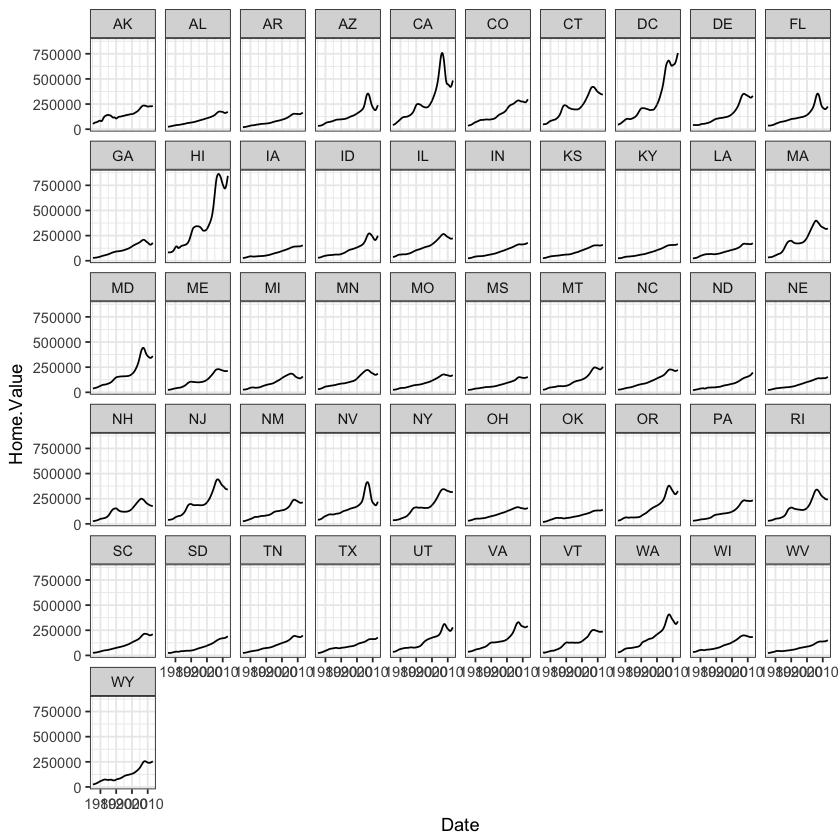

In [43]:
p6 + theme_bw()

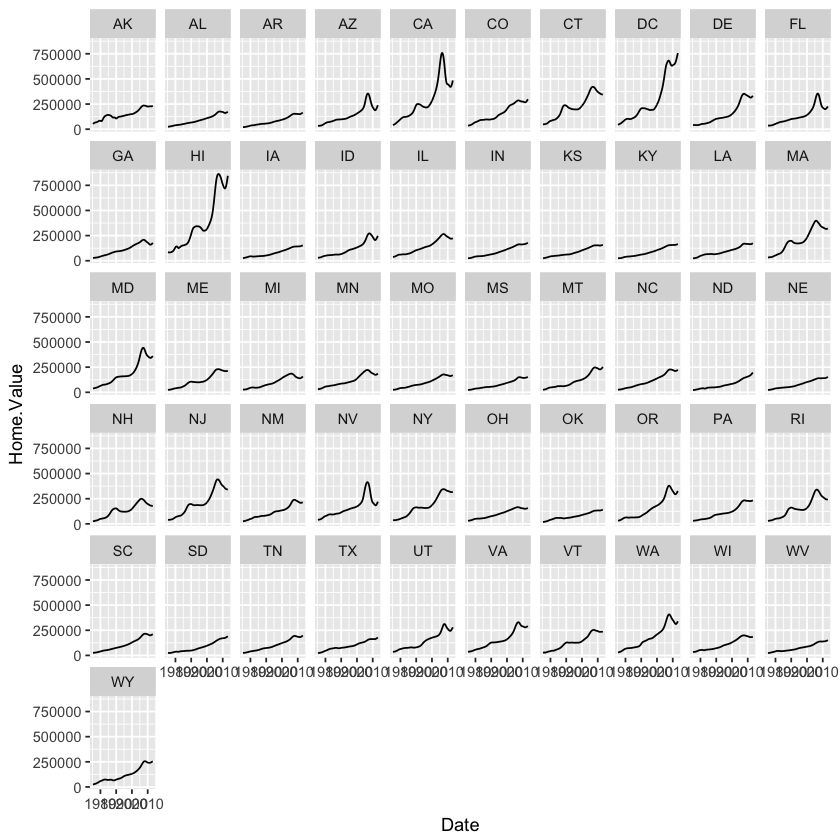

In [44]:
p6 + theme_gray()

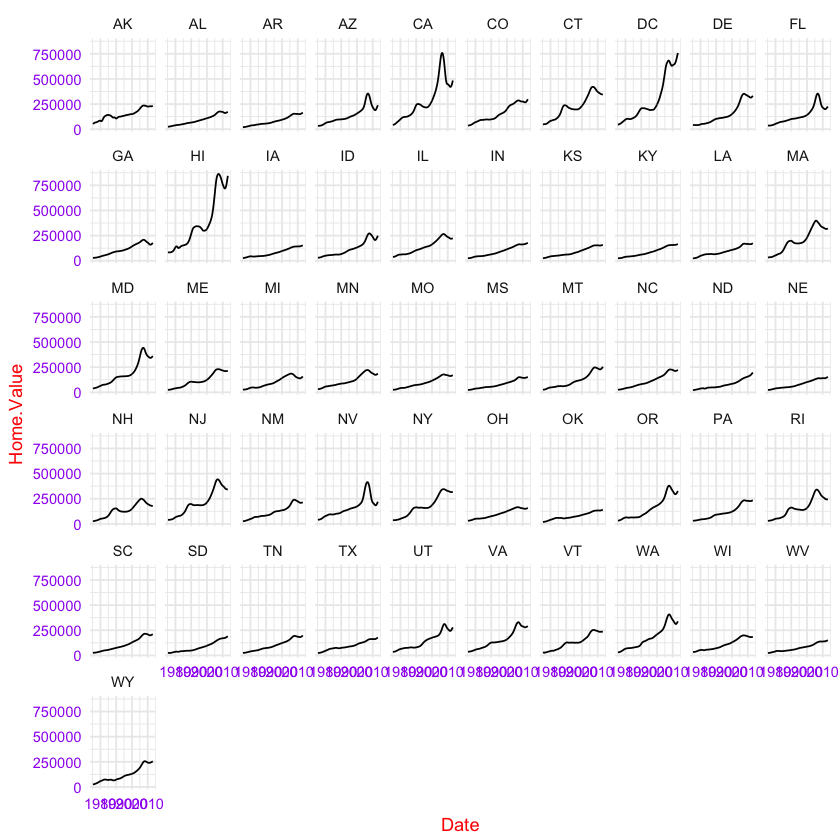

In [45]:
#Overriding theme defaults
p6 + theme_minimal() + theme(text = element_text(color = "red"),axis.text.y = element_text(colour = "purple"),axis.text.x = element_text(colour = "purple"))

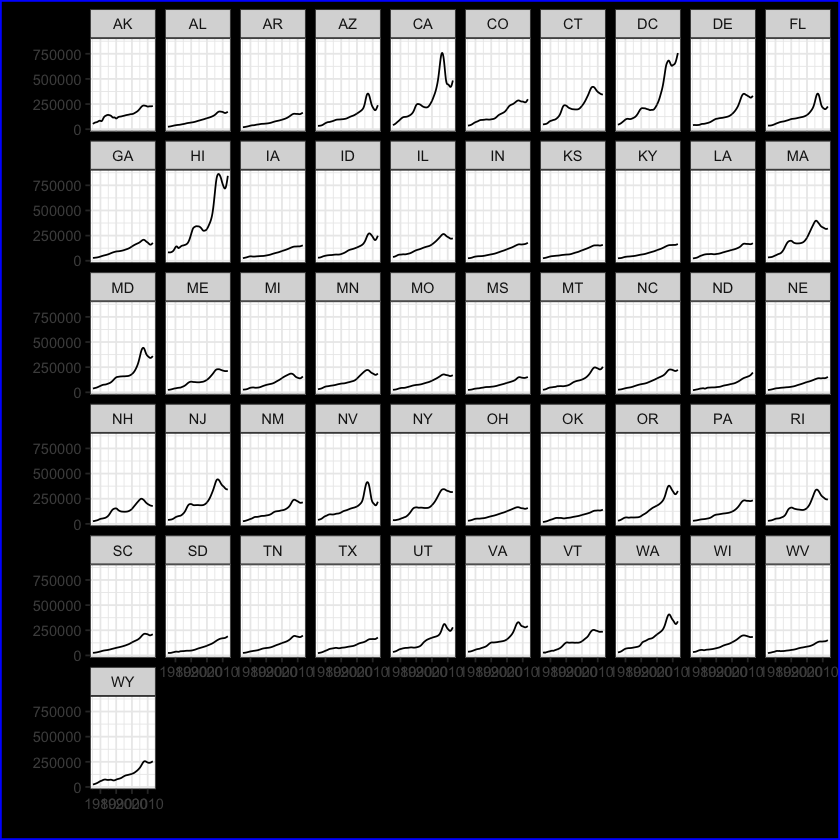

In [46]:
#Creating and Saving New Themes
theme_new = theme_bw() + theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"))
p6 + theme_new